# 📋 Visão Geral do Projeto
Você precisa analisar como o consumo de café influencia a qualidade do sono, com três entregas principais:

1. Análise Exploratória de Dados (EDA)
1. Visualização e Insights
1. Modelo Preditivo

# 🚀 Passo 1: Preparação do Ambiente
Primeiro, vamos configurar o ambiente:

In [14]:
# Instalação de bibliotecas necessárias (se necessário)
!pip install -qq -r "./requirements.txt"

In [3]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

print("✅ Bibliotecas importadas com sucesso!")
print(f"Versão do Pandas: {pd.__version__}")
print(f"Versão do NumPy: {np.__version__}")

✅ Bibliotecas importadas com sucesso!
Versão do Pandas: 2.2.2
Versão do NumPy: 1.24.2


In [4]:
# Constantes
DATA_INPUT_PATH = 'data/inputs/synthetic_coffee_health_10000(in).csv'
DATA_OUTPUT_PATH = 'data/outputs/'

FIGURES_PATH = os.path.join(DATA_OUTPUT_PATH, "figures")
MODELS_PATH = os.path.join(DATA_OUTPUT_PATH, "models")
REPORTS_PATH = os.path.join(DATA_OUTPUT_PATH, "reports")

# 📊 Passo 2: Parte #1 - Análise Exploratória de Dados (EDA)
Agora vamos criar o código completo para a análise exploratória:

In [5]:
# ========================================
# PARTE 1: ANÁLISE EXPLORATÓRIA DE DADOS
# ========================================

# 1. CARREGAMENTO DOS DADOS
# ---------------------------
# Carregar o dataset
df = pd.read_csv(DATA_INPUT_PATH)

print("=" * 60)
print("CARREGAMENTO DOS DADOS")
print("=" * 60)
print(f"✅ Dataset carregado com sucesso!")
print(f"Dimensões: {df.shape[0]} linhas x {df.shape[1]} colunas\n")


CARREGAMENTO DOS DADOS
✅ Dataset carregado com sucesso!
Dimensões: 10000 linhas x 16 colunas



In [6]:
# 2. INFORMAÇÕES INICIAIS
# ------------------------
print("=" * 60)
print("INFORMAÇÕES SOBRE O DATASET")
print("=" * 60)
print("\nPrimeiras 5 linhas:")
display(df.head())

print("\n\nInformações das Colunas:")
display(df.info())

print("\n\nTipos de Dados:")
display(df.dtypes)

INFORMAÇÕES SOBRE O DATASET

Primeiras 5 linhas:


,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1




Informações das Colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 

None



Tipos de Dados:


ID                           int64
Age                          int64
Gender                      object
Country                     object
Coffee_Intake              float64
Caffeine_mg                float64
Sleep_Hours                float64
Sleep_Quality               object
BMI                        float64
Heart_Rate                   int64
Stress_Level                object
Physical_Activity_Hours    float64
Health_Issues               object
Occupation                  object
Smoking                      int64
Alcohol_Consumption          int64
dtype: object

In [7]:
# 3. VERIFICAÇÃO DE QUALIDADE
# ----------------------------
print("\n" + "=" * 60)
print("VERIFICAÇÃO DE QUALIDADE DOS DADOS")
print("=" * 60)

# Valores nulos
print("\nValores Nulos por Coluna:")
valores_nulos = df.isnull().sum()
print(valores_nulos[valores_nulos > 0] if valores_nulos.sum() > 0 else "✅ Nenhum valor nulo encontrado!")

# Valores duplicados
duplicados = df.duplicated().sum()
print(f"\nRegistros Duplicados: {duplicados}")
if duplicados > 0:
    print(f"⚠️ Removendo {duplicados} registros duplicados...")
    df = df.drop_duplicates()
else:
    print("✅ Nenhum registro duplicado!")


VERIFICAÇÃO DE QUALIDADE DOS DADOS

Valores Nulos por Coluna:
Health_Issues    5941
dtype: int64

Registros Duplicados: 0
✅ Nenhum registro duplicado!


In [8]:
# 4. ESTATÍSTICAS DESCRITIVAS
# ----------------------------
print("\n" + "=" * 60)
print("ESTATÍSTICAS DESCRITIVAS - VARIÁVEIS NUMÉRICAS")
print("=" * 60)
print(df.describe())

print("\n" + "=" * 60)
print("ESTATÍSTICAS DESCRITIVAS - VARIÁVEIS CATEGÓRICAS")
print("=" * 60)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Total de categorias únicas: {df[col].nunique()}")


ESTATÍSTICAS DESCRITIVAS - VARIÁVEIS NUMÉRICAS
                ID           Age  Coffee_Intake   Caffeine_mg   Sleep_Hours  \
count  10000.00000  10000.000000   10000.000000  10000.000000  10000.000000   
mean    5000.50000     34.949100       2.509230    238.411010      6.636220   
std     2886.89568     11.160939       1.450248    137.748815      1.222055   
min        1.00000     18.000000       0.000000      0.000000      3.000000   
25%     2500.75000     26.000000       1.500000    138.750000      5.800000   
50%     5000.50000     34.000000       2.500000    235.400000      6.600000   
75%     7500.25000     43.000000       3.500000    332.025000      7.500000   
max    10000.00000     80.000000       8.200000    780.300000     10.000000   

                BMI    Heart_Rate  Physical_Activity_Hours      Smoking  \
count  10000.000000  10000.000000              10000.00000  10000.00000   
mean      23.986860     70.617800                  7.48704      0.20040   
std        3.90


ANÁLISE DE VARIÁVEIS NUMÉRICAS


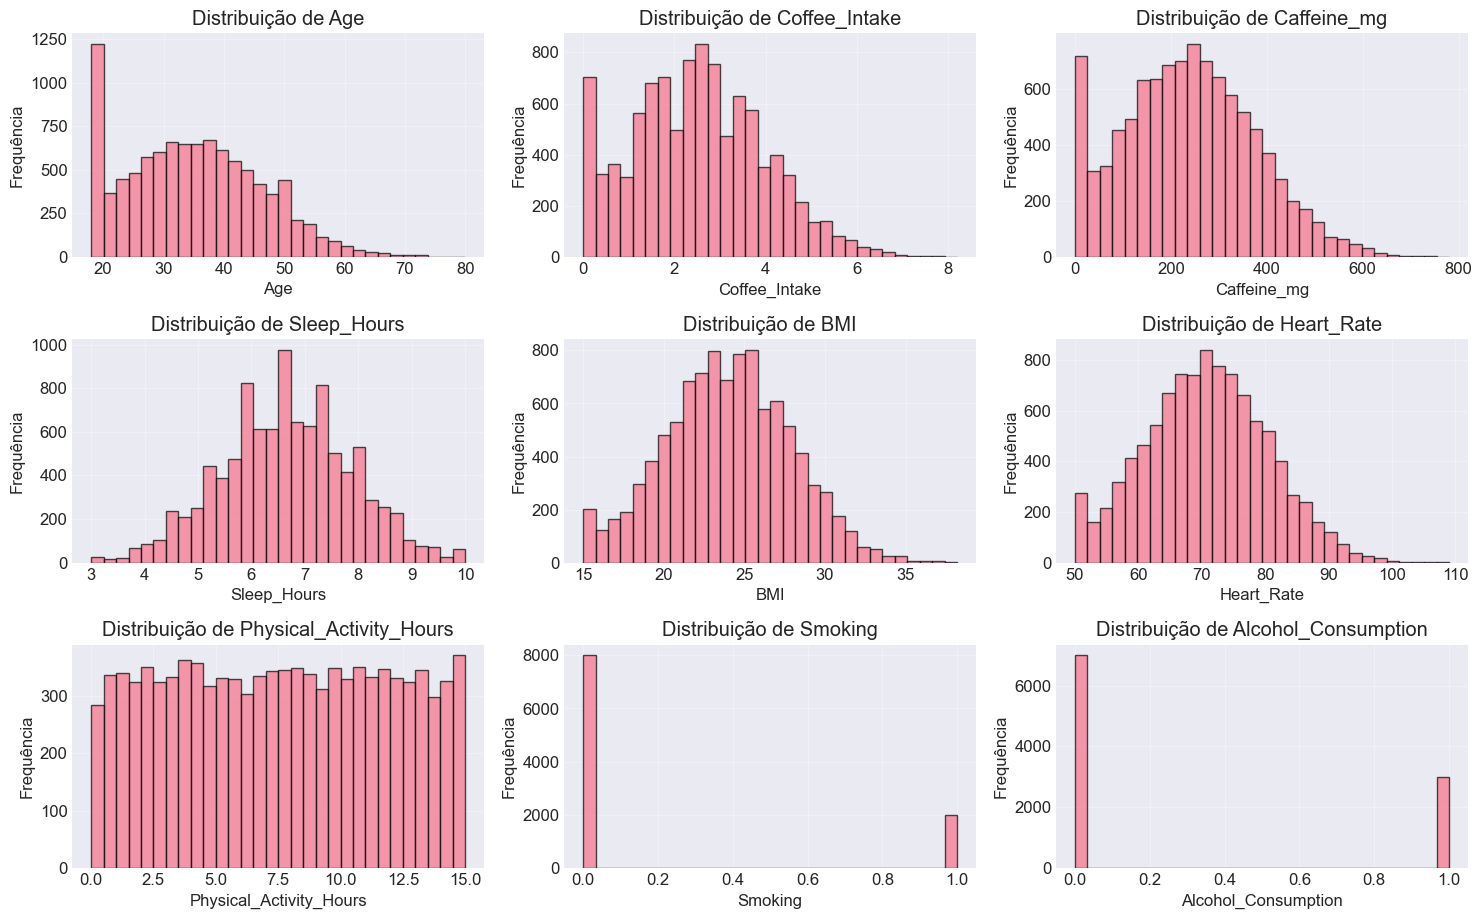

✅ Histogramas salvos em 'data/outputs/figures\histogramas_numericas.png'


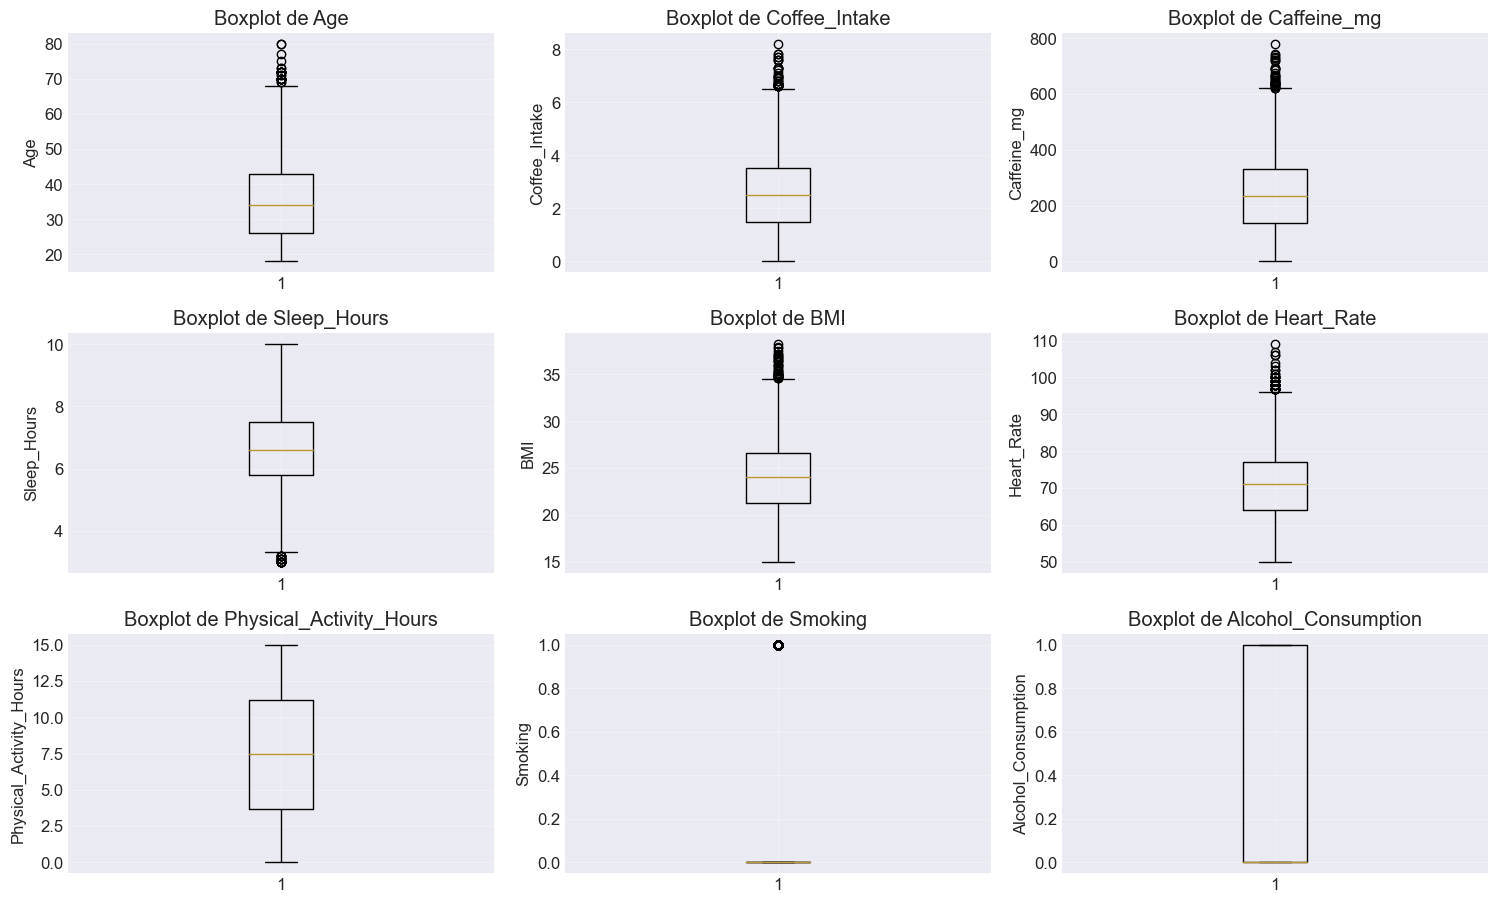

✅ Boxplots salvos em 'data/outputs/figures\boxplots_numericas.png'


In [9]:
# 5. ANÁLISE DE VARIÁVEIS NUMÉRICAS
# ----------------------------------
print("\n" + "=" * 60)
print("ANÁLISE DE VARIÁVEIS NUMÉRICAS")
print("=" * 60)

# Selecionar colunas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Remover ID se existir
numeric_cols = [col for col in numeric_cols if col != 'ID']

# Histogramas
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    if idx < len(axes):
        axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribuição de {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequência')
        axes[idx].grid(True, alpha=0.3)

# Remover eixos extras
for idx in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
histogramas_path = os.path.join(FIGURES_PATH, 'histogramas_numericas.png')
plt.savefig(histogramas_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"✅ Histogramas salvos em '{histogramas_path}'")

# Boxplots
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    if idx < len(axes):
        axes[idx].boxplot(df[col].dropna())
        axes[idx].set_title(f'Boxplot de {col}')
        axes[idx].set_ylabel(col)
        axes[idx].grid(True, alpha=0.3)

# Remover eixos extras
for idx in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
boxplots_path = os.path.join(FIGURES_PATH,'boxplots_numericas.png' )
plt.savefig(boxplots_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"✅ Boxplots salvos em '{boxplots_path}'")


ANÁLISE DE VARIÁVEIS CATEGÓRICAS


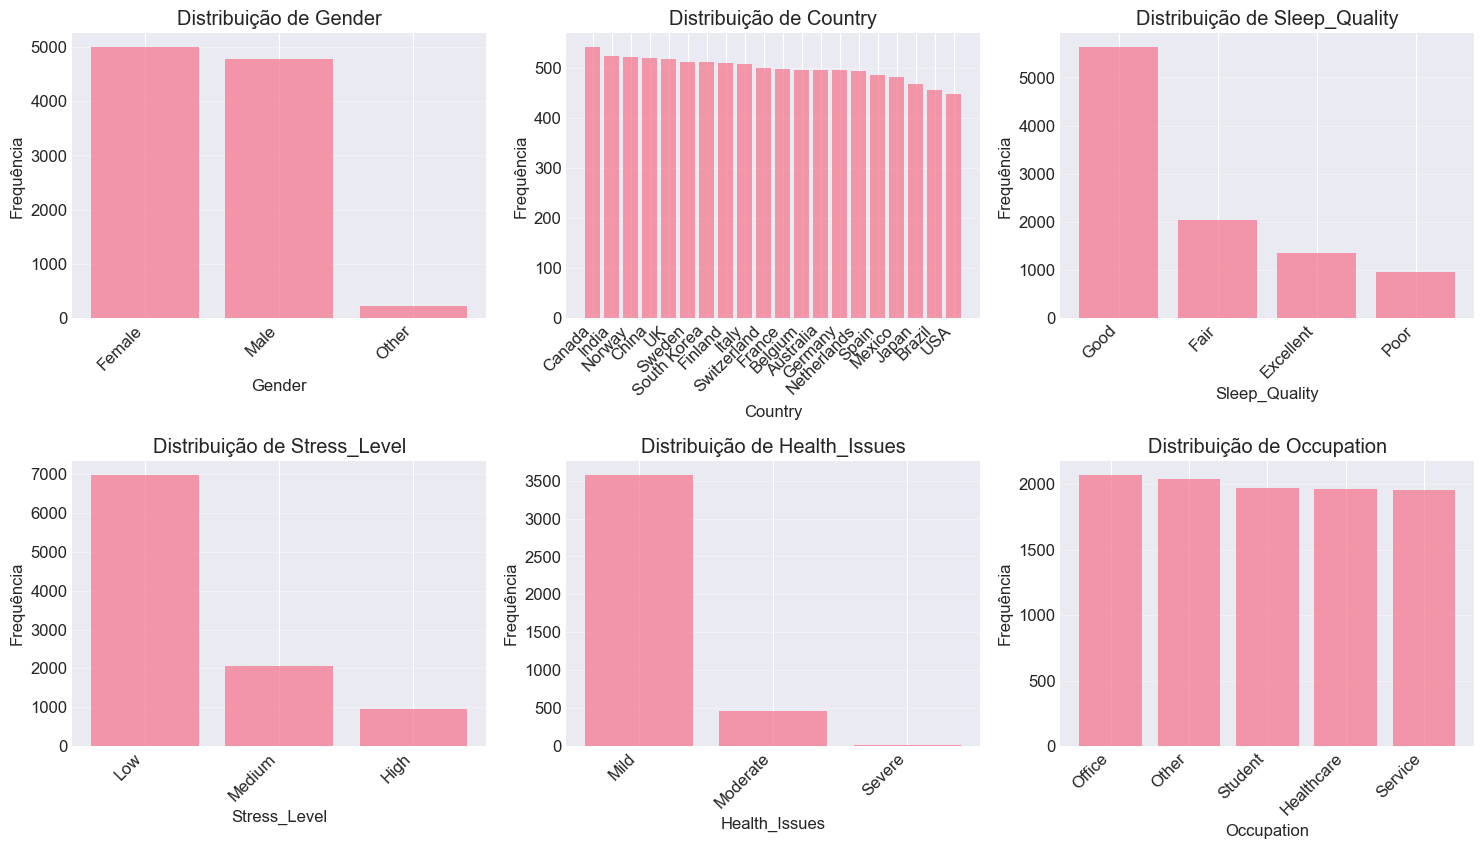

✅ Gráficos de barras salvos em 'data/outputs/figures\barras_categoricas.png'


In [10]:
# 6. ANÁLISE DE VARIÁVEIS CATEGÓRICAS
# ------------------------------------
print("\n" + "=" * 60)
print("ANÁLISE DE VARIÁVEIS CATEGÓRICAS")
print("=" * 60)

# Gráficos de barras
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    if idx < len(axes):
        value_counts = df[col].value_counts()
        axes[idx].bar(range(len(value_counts)), value_counts.values, alpha=0.7)
        axes[idx].set_title(f'Distribuição de {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequência')
        axes[idx].set_xticks(range(len(value_counts)))
        axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
        axes[idx].grid(True, alpha=0.3, axis='y')

# Remover eixos extras
for idx in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
bar_path = os.path.join(FIGURES_PATH, 'barras_categoricas.png')
plt.savefig(bar_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"✅ Gráficos de barras salvos em '{bar_path}'")


ANÁLISE DE CORRELAÇÕES


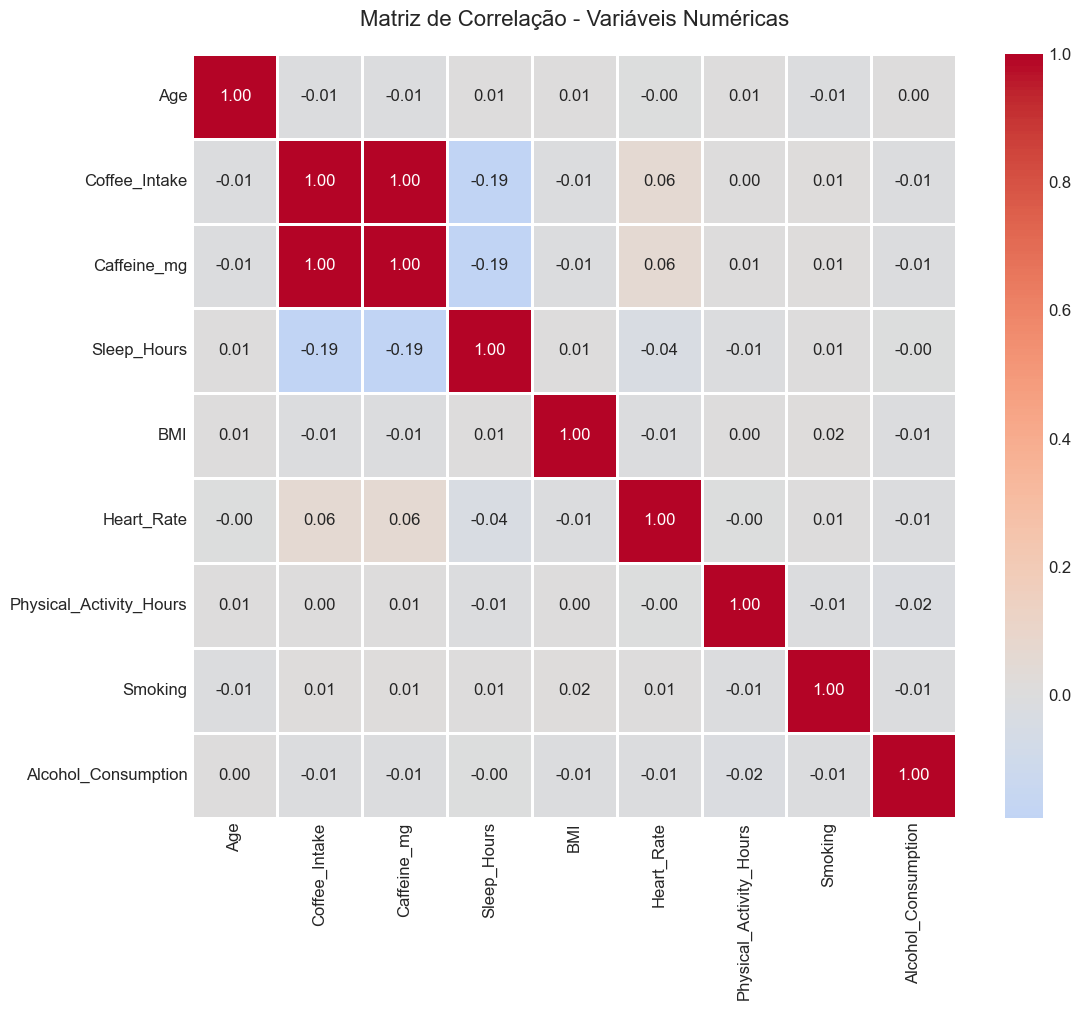

✅ Matriz de correlação salva em 'data/outputs/figures\matriz_correlacao.png'

Correlações mais fortes (|r| > 0.3):
   Variável 1  Variável 2  Correlação
Coffee_Intake Caffeine_mg    0.999814


In [11]:
# 7. ANÁLISE DE CORRELAÇÕES
# --------------------------
print("\n" + "=" * 60)
print("ANÁLISE DE CORRELAÇÕES")
print("=" * 60)

# Matriz de correlação
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=1)
plt.title('Matriz de Correlação - Variáveis Numéricas', fontsize=16, pad=20)
plt.tight_layout()
matriz_path = os.path.join(FIGURES_PATH, 'matriz_correlacao.png')
plt.savefig(matriz_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"✅ Matriz de correlação salva em '{matriz_path}'")

# Correlações mais fortes
print("\nCorrelações mais fortes (|r| > 0.3):")
correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.3:
            correlations.append({
                'Variável 1': correlation_matrix.columns[i],
                'Variável 2': correlation_matrix.columns[j],
                'Correlação': corr_value
            })

if correlations:
    corr_df = pd.DataFrame(correlations).sort_values('Correlação', 
                                                     key=abs, 
                                                     ascending=False)
    print(corr_df.to_string(index=False))
else:
    print("Nenhuma correlação forte encontrada.")


ANÁLISES ESPECÍFICAS


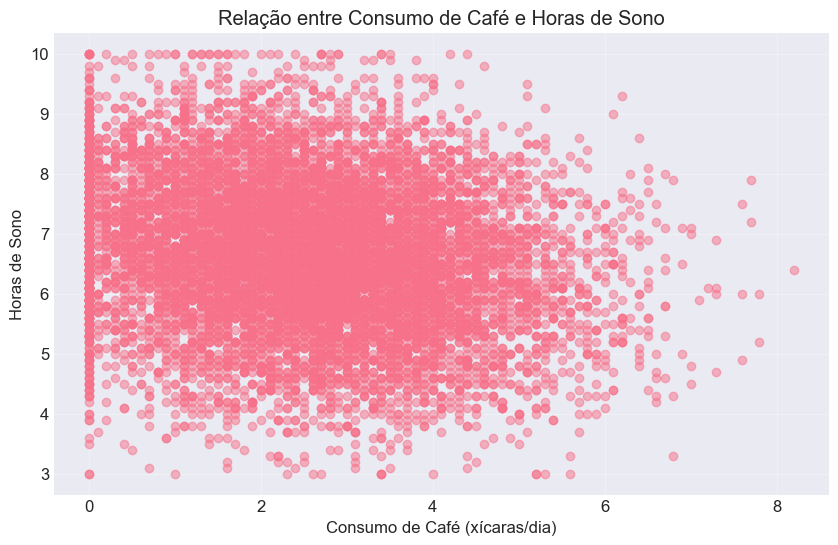

✅ Gráfico salvo em 'data/outputs/figures\cafe_vs_sono.png'


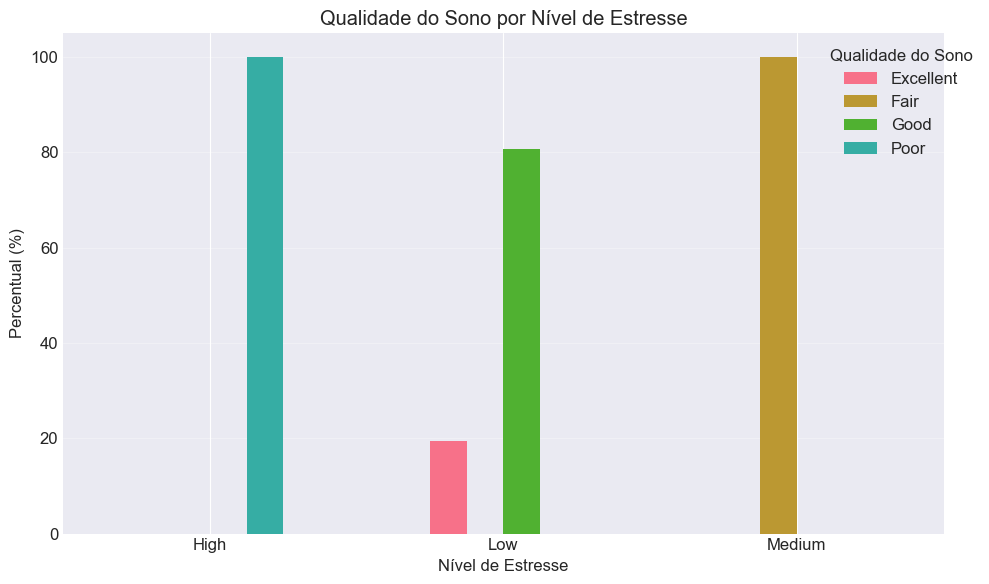

✅ Gráfico salvo em '{analise_estresse_qualidade_sono_path}'

✅ ANÁLISE EXPLORATÓRIA CONCLUÍDA!


In [12]:
# 8. ANÁLISES ESPECÍFICAS
# ------------------------
print("\n" + "=" * 60)
print("ANÁLISES ESPECÍFICAS")
print("=" * 60)

# Consumo de café vs Horas de sono
plt.figure(figsize=(10, 6))
plt.scatter(df['Coffee_Intake'], df['Sleep_Hours'], alpha=0.5)
plt.xlabel('Consumo de Café (xícaras/dia)')
plt.ylabel('Horas de Sono')
plt.title('Relação entre Consumo de Café e Horas de Sono')
plt.grid(True, alpha=0.3)
analise_cafe_sono_path = os.path.join(FIGURES_PATH, 'cafe_vs_sono.png')
plt.savefig(analise_cafe_sono_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"✅ Gráfico salvo em '{analise_cafe_sono_path}'")

# Estresse vs Qualidade do sono
if 'Stress_Level' in df.columns and 'Sleep_Quality' in df.columns:
    plt.figure(figsize=(10, 6))
    cross_tab = pd.crosstab(df['Stress_Level'], df['Sleep_Quality'], normalize='index') * 100
    cross_tab.plot(kind='bar', stacked=False, ax=plt.gca())
    plt.xlabel('Nível de Estresse')
    plt.ylabel('Percentual (%)')
    plt.title('Qualidade do Sono por Nível de Estresse')
    plt.legend(title='Qualidade do Sono', bbox_to_anchor=(1.05, 1))
    plt.xticks(rotation=0)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    analise_estresse_qualidade_sono_path = os.path.join(FIGURES_PATH, 'estresse_vs_qualidade_sono.png')
    plt.savefig(analise_estresse_qualidade_sono_path, dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Gráfico salvo em '{analise_estresse_qualidade_sono_path}'")

print("\n" + "=" * 60)
print("✅ ANÁLISE EXPLORATÓRIA CONCLUÍDA!")
print("=" * 60)